<a href="https://colab.research.google.com/github/shreya-ssalian/mini-project-nitte/blob/main/nitteproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Final_data.xlsx to Final_data (3).xlsx
   Unnamed: 0 week_of_outbreak  year     state_ut            district  \
0           0         1st week  2022    Meghalaya  East Jaintia Hills   
1           1         2nd week  2022  Maharashtra          Gadchiroli   
2           2         3rd week  2022   Tamil Nadu          Pudukottai   
3           3         3rd week  2022      Gujarat               Patan   
4           4         3rd week  2022       Kerala           Ernakulam   

                    Disease Cases  Deaths  day  mon   Latitude  Longitude  \
0  Acute Diarrhoeal Disease   160     NaN    2    1  25.251576  92.484050   
1                   Malaria     7     2.0   10    1  19.759070  80.162281   
2  Acute Diarrhoeal Disease     8     NaN   18    1  10.382651  78.819126   
3  Acute Diarrhoeal Disease     7     NaN   11    1  23.774057  71.683735   
4  Acute Diarrhoeal Disease    14     NaN   24   12   9.984080  76.274146   

      preci   LAI        Temp  
0  0.020354  34.5  2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

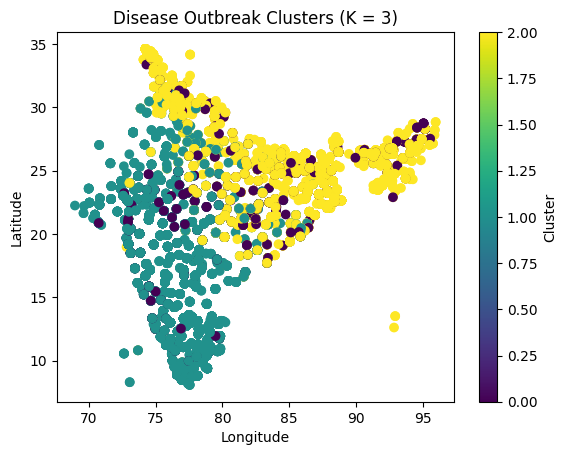

In [ ]:
# 1. Upload Excel file
from google.colab import files
uploaded = files.upload()

# 2. Read Excel file
import pandas as pd

df = pd.read_excel('Final_data.xlsx')
print(df.head())

# 3. Select numeric columns for clustering
features = [
    'Cases',
    'Deaths',
    'Temp',
    'preci',
    'LAI',
    'Latitude',
    'Longitude'
]

X = df[features].copy()

# Convert columns to numeric, coercing errors to NaN
for col in features:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# 4. Handle missing values
X = X.fillna(X.mean())

# 5. Standardize the data
from sklearn.preprocessing import StandardScaler

schaler = StandardScaler()
X_scaled = schaler.fit_transform(X)

# 6. K-Means clustering (K = 3)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 7. Check results
print(df[['Cluster'] + features].head())

# 8. Save clustered data to Excel
output_file = 'clustered_outbreak_data.xlsx'
df.to_excel(output_file, index=False)

# 9. Download the Excel file
files.download(output_file)

# 10. Plot clusters using location
import matplotlib.pyplot as plt

plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Disease Outbreak Clusters (K = 3)')
plt.colorbar(label='Cluster')
plt.show()

Saving Final_data.xlsx to Final_data (6).xlsx
   Unnamed: 0 week_of_outbreak  year     state_ut            district  \
0           0         1st week  2022    Meghalaya  East Jaintia Hills   
1           1         2nd week  2022  Maharashtra          Gadchiroli   
2           2         3rd week  2022   Tamil Nadu          Pudukottai   
3           3         3rd week  2022      Gujarat               Patan   
4           4         3rd week  2022       Kerala           Ernakulam   

                    Disease Cases  Deaths  day  mon   Latitude  Longitude  \
0  Acute Diarrhoeal Disease   160     NaN    2    1  25.251576  92.484050   
1                   Malaria     7     2.0   10    1  19.759070  80.162281   
2  Acute Diarrhoeal Disease     8     NaN   18    1  10.382651  78.819126   
3  Acute Diarrhoeal Disease     7     NaN   11    1  23.774057  71.683735   
4  Acute Diarrhoeal Disease    14     NaN   24   12   9.984080  76.274146   

      preci   LAI        Temp  
0  0.020354  34.5  2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

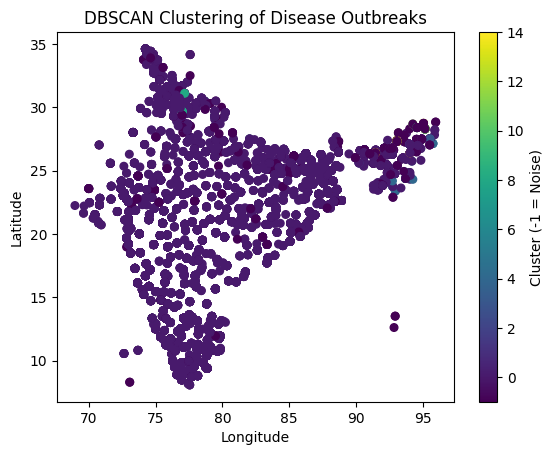

In [ ]:
# 1. Upload Excel file
from google.colab import files
uploaded = files.upload()

# 2. Read Excel file
import pandas as pd

df = pd.read_excel('Final_data.xlsx')
print(df.head())

# 3. Select numeric columns for clustering
features = [
    'Cases',
    'Deaths',
    'Temp',
    'preci',
    'LAI',
    'Latitude',
    'Longitude'
]

X = df[features].copy()

# Convert columns to numeric, coercing errors to NaN
for col in features:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# 4. Handle missing values
X = X.fillna(X.mean())

# 5. Standardize data (VERY IMPORTANT for DBSCAN)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Apply DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=5)  # you can tune eps
df['Cluster'] = dbscan.fit_predict(X_scaled)

# 7. Check results
print(df['Cluster'].value_counts())
print(df[['Cluster'] + features].head())

# 8. Save results to Excel
output_file = 'dbscan_clustered_outbreak_data.xlsx'
df.to_excel(output_file, index=False)

# 9. Download Excel file
files.download(output_file)

# 10. Plot clusters using Latitude & Longitude
import matplotlib.pyplot as plt

plt.scatter(
    df['Longitude'],
    df['Latitude'],
    c=df['Cluster'],
    cmap='viridis',
    s=30
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Disease Outbreaks')
plt.colorbar(label='Cluster (-1 = Noise)')
plt.show()

In [ ]:
# 1️⃣ Upload Excel
from google.colab import files
uploaded = files.upload()

# 2️⃣ Load data
import pandas as pd

df = pd.read_excel('Final_data.xlsx')  # <-- change this
print(df.head())

# Convert 'Cases' to numeric, coercing errors to NaN
df['Cases'] = pd.to_numeric(df['Cases'], errors='coerce')

# 3️⃣ Create binary target variable (Outbreak)
# You can adjust threshold based on your data
threshold = 10  # e.g., Cases > 10 is an outbreak
df['Outbreak'] = (df['Cases'] > threshold).astype(int)

# 4️⃣ Select features for ML models
features = ['Deaths', 'Temp', 'preci', 'LAI', 'Latitude', 'Longitude']
X = df[features]

# 5️⃣ Handle missing values
X = X.fillna(X.mean())

# 6️⃣ Split data into train and test sets
from sklearn.model_selection import train_test_split

y = df['Outbreak'] # Define y before splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7️⃣ Standardize features for Logistic Regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8️⃣ Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# 9️⃣ Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 🔟 Model Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    try:
        print("ROC-AUC:", roc_auc_score(y_true, y_pred))
    except:
        pass
    print("\n")

evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# 1️⃣1️⃣ Heatmap of cases by state/district
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
heatmap_data = df.pivot_table(index='district', columns='mon', values='Cases', aggfunc='sum').fillna(0)
sns.heatmap(heatmap_data, cmap='Reds')
plt.title('Monthly Cases Heatmap by District')
plt.show()

# 1️⃣2️⃣ Time-series plot of total cases per month
monthly_cases = df.groupby('mon')['Cases'].sum()
plt.figure(figsize=(10,5))
plt.plot(monthly_cases.index, monthly_cases.values, marker='o')
plt.title('Total Cases per Month')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.show()

# 1️⃣3️⃣ Optional: Early warning prediction
# Predict probability of outbreak in next week
# Ensure X is aligned with the data used for training RF
X_for_prediction = df[features].copy()
for col in features:
    X_for_prediction[col] = pd.to_numeric(X_for_prediction[col], errors='coerce')
X_for_prediction = X_for_prediction.fillna(X_for_prediction.mean())

df['Outbreak_Prob'] = rf.predict_proba(X_for_prediction)[:,1]

# Highlight high-risk districts
high_risk = df[df['Outbreak_Prob'] > 0.7]
print("High-risk districts this week:")
print(high_risk[['district','state_ut','Outbreak_Prob']])

Saving Final_data.xlsx to Final_data (8).xlsx
   Unnamed: 0 week_of_outbreak  year     state_ut            district  \
0           0         1st week  2022    Meghalaya  East Jaintia Hills   
1           1         2nd week  2022  Maharashtra          Gadchiroli   
2           2         3rd week  2022   Tamil Nadu          Pudukottai   
3           3         3rd week  2022      Gujarat               Patan   
4           4         3rd week  2022       Kerala           Ernakulam   

                    Disease Cases  Deaths  day  mon   Latitude  Longitude  \
0  Acute Diarrhoeal Disease   160     NaN    2    1  25.251576  92.484050   
1                   Malaria     7     2.0   10    1  19.759070  80.162281   
2  Acute Diarrhoeal Disease     8     NaN   18    1  10.382651  78.819126   
3  Acute Diarrhoeal Disease     7     NaN   11    1  23.774057  71.683735   
4  Acute Diarrhoeal Disease    14     NaN   24   12   9.984080  76.274146   

      preci   LAI        Temp  
0  0.020354  34.5  2

TypeError: '>' not supported between instances of 'datetime.datetime' and 'int'